In [1]:
import pandas as pd 
df = pd.read_csv('diabetes2.csv')
df.head()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1

<Figure size 1080x432 with 0 Axes>

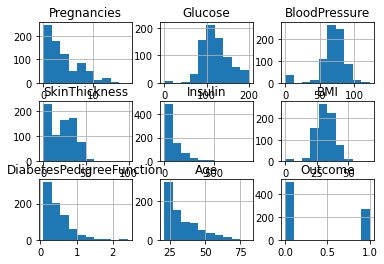

<Figure size 1080x432 with 0 Axes>

In [2]:
from matplotlib import pyplot as plt

df.hist()
plt.figure(figsize = (15,6))

C:\Users\Shree\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\Shree\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\Shree\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdep

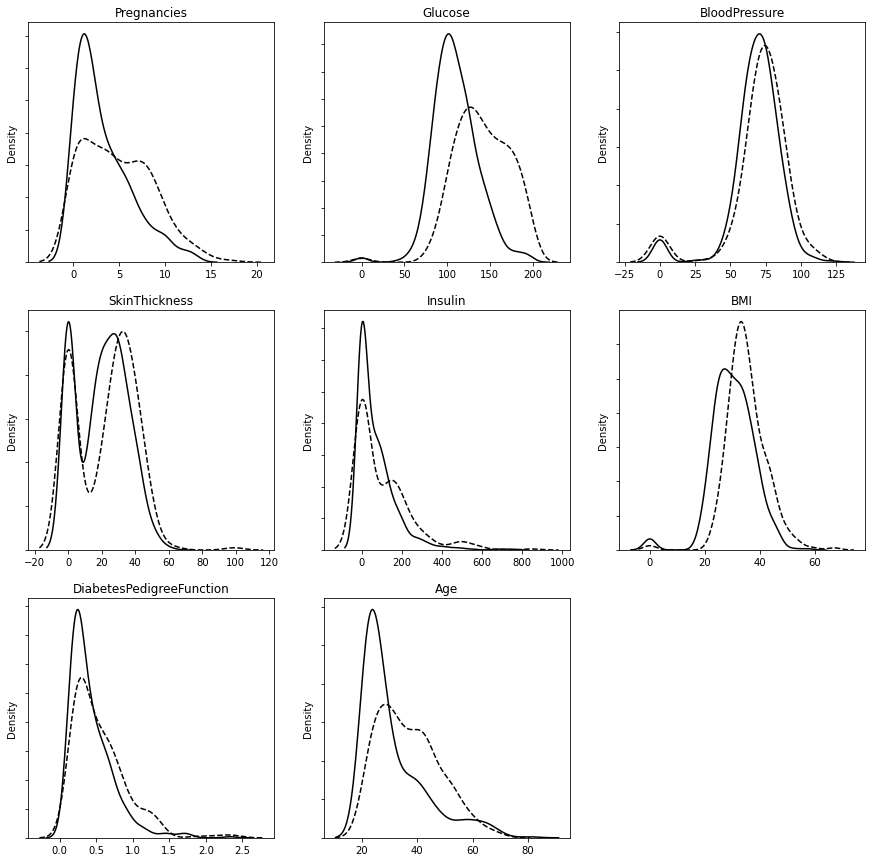

In [3]:
import seaborn as sns 
plt.subplots(3,3,figsize = (15,15))
for index, col in enumerate(df.columns):
    ax = plt.subplot(3,3,index +1)
    ax.yaxis.set_ticklabels([])
    sns.distplot(df.loc[df.Outcome == 0][col], hist = False,axlabel = False,kde_kws = {'linestyle':'-','color' :'Black', 'label':"No Diabetes"})
    sns.distplot(df.loc[df.Outcome == 1][col], hist = False,axlabel = False,kde_kws = {'linestyle':'--','color' :'Black', 'label':"Diabetes"})
    ax.set_title(col)
plt.subplot(3,3,9).set_visible(False)
plt.show()

In [4]:
df.isnull().any()

Pregnancies                 False
Glucose                     False
BloodPressure               False
SkinThickness               False
Insulin                     False
BMI                         False
DiabetesPedigreeFunction    False
Age                         False
Outcome                     False
dtype: bool

In [5]:
df.describe()

Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    31.992578                  0.471876   33.240885    0.348958  
std      7.884160                  0.331329   11.760232    0.476951  
min      0.000000                  0.078000   21.000000    0.000000  
25%     27.300000                  0.243750   24.000000    0.000000  
50%     32.000000                  0.372500   29.000000    0.000000  
75%     36.600000                  0.626250   41.000000    1.000000  
max     67.100000                  2.420000   81.000000    1.000000

In [6]:
for col in df.columns:
    missing_rows = df.loc[df[col]==0].shape[0]
    print(col+ ":   " + str(missing_rows))

Pregnancies:   111
Glucose:   5
BloodPressure:   35
SkinThickness:   227
Insulin:   374
BMI:   11
DiabetesPedigreeFunction:   0
Age:   0
Outcome:   500


In [7]:
import numpy as np 
df['Glucose'] = df['Glucose'].fillna(df['Glucose'].mean())
df['BloodPressure'] = df['BloodPressure'].fillna(df['BloodPressure'].mean())
df['SkinThickness'] = df['SkinThickness'].fillna(df['SkinThickness'].mean())
df['Insulin'] = df['Insulin'].fillna(df['Insulin'].mean())
df['BMI'] = df['BMI'].fillna(df['BMI'].mean())

In [8]:
from sklearn import preprocessing
df_scaled = preprocessing.scale(df)
df_scaled = pd.DataFrame(df_scaled,columns= df.columns)

In [9]:
df_scaled['Outcome'] = df['Outcome']
df = df_scaled

In [10]:
print(df.describe().loc[['mean','std','max'],].round(2).abs())

      Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
mean         0.00     0.00           0.00           0.00     0.00  0.00   
std          1.00     1.00           1.00           1.00     1.00  1.00   
max          3.91     2.44           2.73           4.92     6.65  4.46   

      DiabetesPedigreeFunction   Age  Outcome  
mean                      0.00  0.00     0.35  
std                       1.00  1.00     0.48  
max                       5.88  4.06     1.00  


In [11]:
from sklearn.model_selection import train_test_split
X = df.loc[:, df.columns != 'Outcome']
y = df.loc[:,'Outcome']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2)


In [12]:
! pip install tensorflow

In [13]:
from keras.models import sequential
model  = sequential()

TypeError: 'module' object is not callable